# The Twitter API and Authentication

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Twitter-API-and-Authentication" data-toc-modified-id="The-Twitter-API-and-Authentication-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Twitter API and Authentication</a></span><ul class="toc-item"><li><span><a href="#API-Authentication" data-toc-modified-id="API-Authentication-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>API Authentication</a></span></li><li><span><a href="#MyStreamListener" data-toc-modified-id="MyStreamListener-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>MyStreamListener</a></span></li><li><span><a href="#Streaming-tweets" data-toc-modified-id="Streaming-tweets-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Streaming tweets</a></span></li><li><span><a href="#Load-and-explore-your-Twitter-data" data-toc-modified-id="Load-and-explore-your-Twitter-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load and explore your Twitter data</a></span></li><li><span><a href="#Twitter-data-to-DataFrame" data-toc-modified-id="Twitter-data-to-DataFrame-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Twitter data to DataFrame</a></span></li><li><span><a href="#A-little-bit-of-Twitter-text-analysis" data-toc-modified-id="A-little-bit-of-Twitter-text-analysis-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>A little bit of Twitter text analysis</a></span></li><li><span><a href="#Plotting-your-Twitter-data" data-toc-modified-id="Plotting-your-Twitter-data-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Plotting your Twitter data</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## The Twitter API and Authentication

- Herein, you’ll learn
    - How to stream data from the Twi!er API 
    - How to filter incoming tweets for keywords 
    - About API Authentication and OAuth 
    - How to use the Tweepy Python package
- %pip install tweepy

- Access the Twitter API
    1. Need a Twitter account
    2. go to https://developer.twitter.com
    3. sign in
    4. creat an app
    5. 'Keys and tokens' page
    6. get your 'Consumer API keys', 'Access token & access token secret'
- Consumer API keys
        Nvz7Rwi6Ed6TGRSGcbmhd4Yzh (API key)
        woi2jBhsvS9hnmbQTAEA25tT6TP2iOR4l933H5JPGaZthKKrCn (API secret key)

- Access token & access token secret
        1176429111650045953-cNDeG53hD7sP01s9qrnqjgHVRrP7oY (Access token)
        NvQJD5PVQFD22k0EGa8YrTZfkt9iVbL5UEofQU1gbFqUL (Access token secret)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

### API Authentication

In [2]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1176429111650045953-cNDeG53hD7sP01s9qrnqjgHVRrP7oY"
access_token_secret = "NvQJD5PVQFD22k0EGa8YrTZfkt9iVbL5UEofQU1gbFqUL"
consumer_key = "Nvz7Rwi6Ed6TGRSGcbmhd4Yzh"
consumer_secret = "woi2jBhsvS9hnmbQTAEA25tT6TP2iOR4l933H5JPGaZthKKrCn"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

### MyStreamListener

In [3]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")
    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()
    def on_error(self, status):
        print(status)

### Streaming tweets

In [4]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(languages = ["en"])

406
406


KeyboardInterrupt: 

### Load and explore your Twitter data

In [5]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'exercise/tweets3.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


### Twitter data to DataFrame

In [6]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame

print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


### A little bit of Twitter text analysis

In [7]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [8]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


### Plotting your Twitter data
- %pip install seaborn

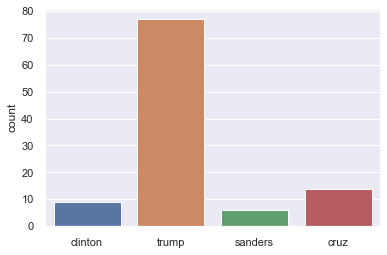

In [9]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()


## Summary 

- What you’ve learned:
    - Importing text files and flat files 
    - Importing files in other formats 
    - Writing SQL queries
    - Getting data from relational databases 
    - Pulling data from the web
    - Pulling data from APIs